In [1]:
import pandas as pd
import os
import shutil
import numpy as np
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
import os 
import pandas as pd

data_dir = "COVID19Data/Train_Dataset/"
classes = os.listdir(data_dir)

image_counts={}
for c in classes:
    try: 
        path = data_dir + c
        count = len(os.listdir(path))
        image_counts[c]= count
    except:
        pass

df = pd.DataFrame.from_dict(image_counts, orient='index')
df

,0
SARS CoV-2 COVID-19 Negative,100
SARS CoV-2 COVID-19 Positive,100


In [3]:
import os 
import pandas as pd

data_dir = "COVID19Data/Test_Dataset/"
classes = os.listdir(data_dir)

image_counts={}
for c in classes:
    try: 
        path = data_dir + c
        count = len(os.listdir(path))
        image_counts[c]= count
    except:
        pass

df = pd.DataFrame.from_dict(image_counts, orient='index')
df

,0
SARS CoV-2 COVID-19 Negative,35
SARS CoV-2 COVID-19 Positive,35


In [4]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [5]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = train_datagen.flow_from_directory('COVID19Data/Train_Dataset',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 200 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'SARS CoV-2 COVID-19 Negative': 0, 'SARS CoV-2 COVID-19 Positive': 1}

In [8]:
validation_generator = test_dataset.flow_from_directory('COVID19Data/Test_Dataset',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 70 images belonging to 2 classes.


In [9]:
validation_generator.class_indices

{'SARS CoV-2 COVID-19 Negative': 0, 'SARS CoV-2 COVID-19 Positive': 1}

In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 50,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 15
)

Epoch 1/10
50/50 [==============================] - 683s 14s/step - loss: 0.5076 - accuracy: 0.7004 - val_loss: 0.1178 - val_accuracy: 0.9714
Epoch 2/10
50/50 [==============================] - 472s 9s/step - loss: 0.1996 - accuracy: 0.9309 - val_loss: 0.0370 - val_accuracy: 0.9857
Epoch 3/10
50/50 [==============================] - 483s 10s/step - loss: 0.1107 - accuracy: 0.9588 - val_loss: 0.0193 - val_accuracy: 0.9857
Epoch 4/10
50/50 [==============================] - 476s 10s/step - loss: 0.0574 - accuracy: 0.9794 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 5/10
50/50 [==============================] - 479s 10s/step - loss: 0.0887 - accuracy: 0.9665 - val_loss: 0.0057 - val_accuracy: 0.9857
Epoch 6/10
50/50 [==============================] - 479s 10s/step - loss: 0.0477 - accuracy: 0.9853 - val_loss: 2.0150e-04 - val_accuracy: 0.9714
Epoch 7/10
50/50 [==============================] - 484s 10s/step - loss: 0.0521 - accuracy: 0.9846 - val_loss: 0.0032 - val_accuracy: 0.9857
Epo

In [11]:
model.save("COVID19Detection.h5")

In [12]:
model = load_model("COVID19Detection.h5")
import os
train_generator.class_indices

{'SARS CoV-2 COVID-19 Negative': 0, 'SARS CoV-2 COVID-19 Positive': 1}

In [13]:
print(os.listdir("COVID19Data"))
print(os.listdir("COVID19Data/Train_Dataset"))

['Test_Dataset', 'Train_Dataset']
['SARS CoV-2 COVID-19 Negative', 'SARS CoV-2 COVID-19 Positive']


In [14]:
history = history
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


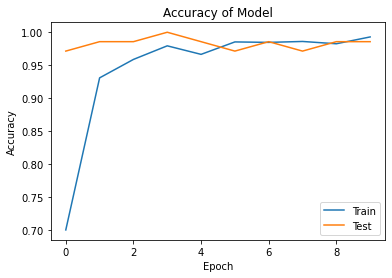

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of Model')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

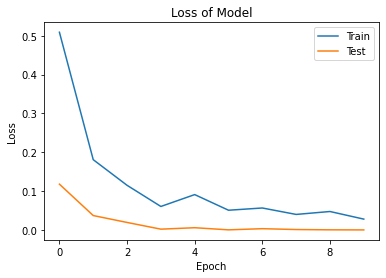

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Following is our prediction: 
COVID-19 Positive


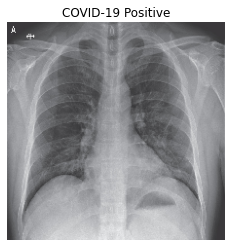

In [17]:
from keras.preprocessing import image
import numpy as np
prediction= image.load_img('Covid19Validation/Positive/1.JPEG', target_size=(224,224))
pred=image.img_to_array(prediction)
pred= np.expand_dims(pred, axis=0)
result= model.predict(pred)

if result[0][0]==0:
    answer='COVID-19 Negative (Healthy)'
else:
    answer='COVID-19 Positive'
print("Following is our prediction: ")
print(answer)

plt.figure(figsize = (4,4))
plt.imshow(prediction)
plt.axis('off')
plt.title(answer)
plt.show()

Following is our prediction: 
COVID-19 Negative (Healthy)


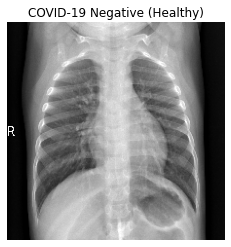

In [18]:
from keras.preprocessing import image
import numpy as np
prediction= image.load_img('Covid19Validation/Negative/1.JPEG', target_size=(224,224))
pred=image.img_to_array(prediction)
pred= np.expand_dims(pred, axis=0)
result= model.predict(pred)

if result[0][0]==0:
    answer='COVID-19 Negative (Healthy)'
else:
    answer='COVID-19 Positive'
print("Following is our prediction: ")
print(answer)

plt.figure(figsize = (4,4))
plt.imshow(prediction)
plt.axis('off')
plt.title(answer)
plt.show()

In [85]:
y_actual = []
y_test = []

In [86]:
import numpy as np
for i in os.listdir("./Covid19Validation/Positive/"):
  img = image.load_img("./Covid19Validation/Positive/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [87]:
for i in os.listdir("./Covid19Validation/Negative/"):
  img = image.load_img("./Covid19Validation/Negative/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [88]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual,y_test)
import seaborn as sns

In [94]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19 Negative","Covid-19 Positive"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[44  6]
 [ 2 48]]


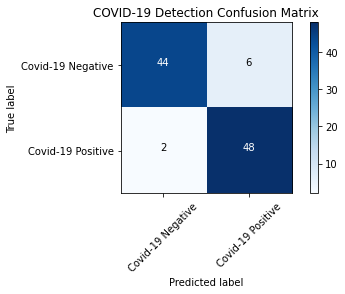

In [95]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='COVID-19 Detection Confusion Matrix',cmap=plt.cm.Blues)

In [96]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_test, y_actual))
print('normal = 0 , covid = 1')
print(confusion_matrix(y_test, y_actual)) 
print(accuracy_score(y_test, y_actual)) 

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        46
           1       0.96      0.89      0.92        54

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100

normal = 0 , covid = 1
[[44  2]
 [ 6 48]]
0.92


In [92]:
print(accuracy_score(y_test, y_actual))

0.92
